In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("/content/201801-fordgobike-tripdata.csv")

🔥 First, we will do:
Load the dataset

View the first few rows (to understand what it looks like)

Check data types

Check for missing values

Check for duplicate rows

Basic statistics of numerical columns


In [7]:
#Top 5 Rows from head
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765.0,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815.0,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039.0,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321.0,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617.0,Subscriber,1991.0,Male,No


In [8]:
# Rows and Columns size
print("Dataset size:", df.shape)

Dataset size: (73909, 16)


In [9]:
# Step 4: Check data types
print("\nData Types:\n", df.dtypes)



Data Types:
 duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    float64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [10]:
# Step 5: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              1
end_station_latitude          1
end_station_longitude         1
bike_id                       1
user_type                     1
member_birth_year          6044
member_gender              6020
bike_share_for_all_trip       1
dtype: int64


In [11]:
# Step 6: Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [12]:
# Step 7: Basic statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        duration_sec  start_station_id  start_station_latitude  \
count  73909.000000      73909.000000            73909.000000   
mean     859.507935        104.504106               37.773178   
std     2510.182776         88.095893                0.086667   
min       61.000000          3.000000               37.317298   
25%      361.000000         30.000000               37.771662   
50%      557.000000         79.000000               37.781270   
75%      855.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             73909.000000    73909.000000          73908.000000   
mean               -122.361116      101.604649             37.773391   
std                   0.106079       87.170551              0.086455   
min                -122.444293        3.000000             37.317298   
25%                -122.412408  

#Further Data Wrangling

In [14]:
# Step 1: Convert 'start_time' and 'end_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [15]:
# Step 2: Create 'ride_minutes' column
df['ride_minutes'] = df['duration_sec'] / 60

In [16]:
# Step 3: Create 'member_age' column
df['member_age'] = 2018 - df['member_birth_year']

In [17]:
# Step 4: Extract 'start_hour', 'start_day', 'start_month' from 'start_time'
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()  # Monday, Tuesday etc.
df['start_month'] = df['start_time'].dt.month_name()  # January, February etc.


In [18]:
# Step 5: Handle missing values (optional: drop rows with missing 'member_gender' or 'member_birth_year')
df = df.dropna(subset=['member_gender', 'member_birth_year'])

In [19]:
# Step 6: Remove duplicates if any
df = df.drop_duplicates()

In [20]:
# Step 7: Final check
print("\nFinal Data Information:\n")
print(df.info())



Final Data Information:

<class 'pandas.core.frame.DataFrame'>
Index: 67865 entries, 0 to 73907
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             67865 non-null  int64         
 1   start_time               67865 non-null  datetime64[ns]
 2   end_time                 67865 non-null  datetime64[ns]
 3   start_station_id         67865 non-null  int64         
 4   start_station_name       67865 non-null  object        
 5   start_station_latitude   67865 non-null  float64       
 6   start_station_longitude  67865 non-null  float64       
 7   end_station_id           67865 non-null  int64         
 8   end_station_name         67865 non-null  object        
 9   end_station_latitude     67865 non-null  float64       
 10  end_station_longitude    67865 non-null  float64       
 11  bike_id                  67865 non-null  float64       
 12  user_type  

#Univariate Exploration and Analysis (Single Column Study)

🎯 Goal: Explore one variable at a time and find patterns.

We can explore:

Ride duration (ride_minutes)

Age of members (member_age)

Member gender

User type (Subscriber or Customer)

Start hours

Start days

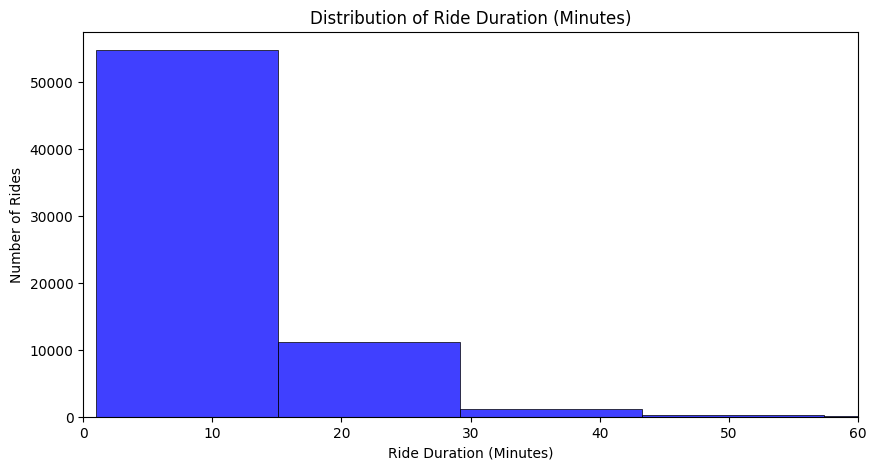

In [21]:
# 1. Distribution of Ride Minutes
plt.figure(figsize=(10,5))
sns.histplot(df['ride_minutes'], bins=100, color='blue')
plt.xlim(0, 60)
plt.title('Distribution of Ride Duration (Minutes)')
plt.xlabel('Ride Duration (Minutes)')
plt.ylabel('Number of Rides')
plt.show()

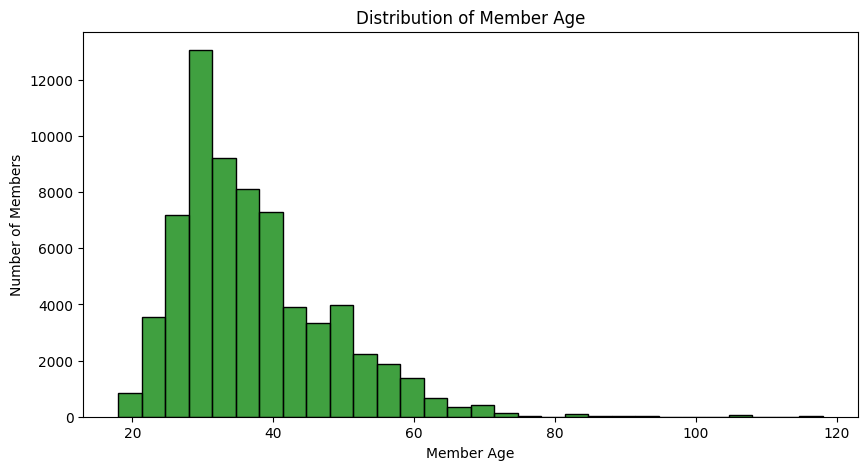

In [22]:
# 2. Distribution of Member Age
plt.figure(figsize=(10,5))
sns.histplot(df['member_age'], bins=30, color='green')
plt.title('Distribution of Member Age')
plt.xlabel('Member Age')
plt.ylabel('Number of Members')
plt.show()


<ipython-input-23-e1967467e6e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='member_gender', palette='pastel')


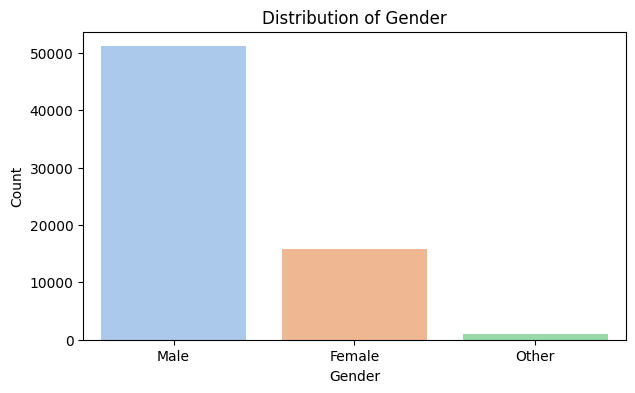

In [23]:

# 3. Countplot of Member Gender
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='member_gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-24-a2ec7744c166>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='user_type', palette='pastel')


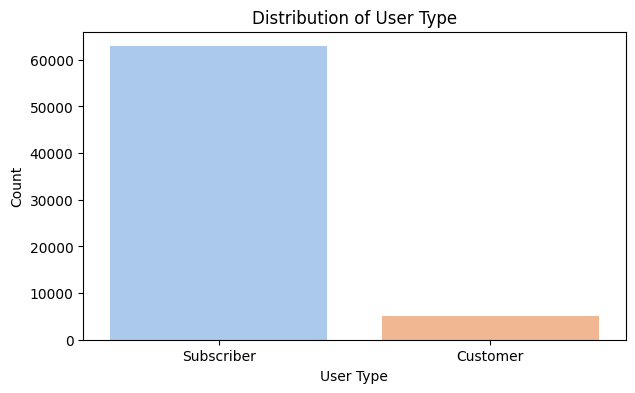

In [24]:
# 4. Countplot of User Type
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='user_type', palette='pastel')
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

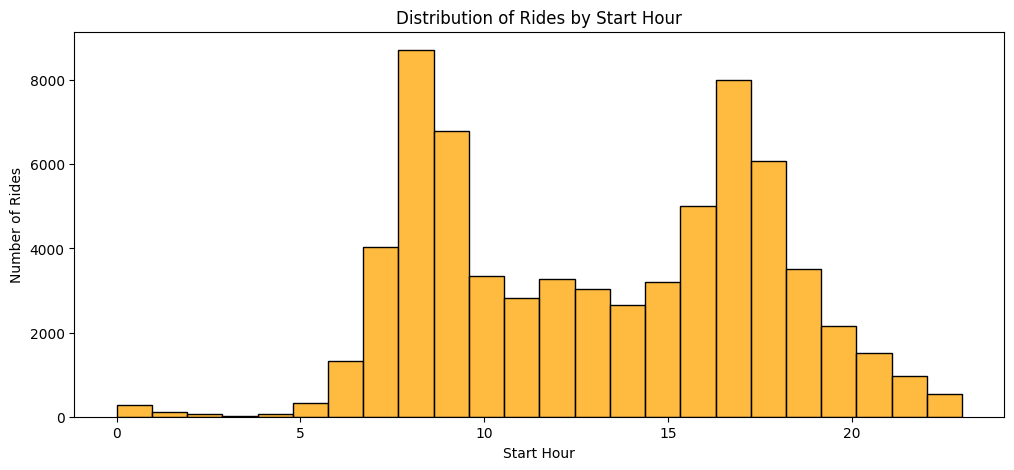

In [25]:
# 5. Start Hour Distribution
plt.figure(figsize=(12,5))
sns.histplot(df['start_hour'], bins=24, kde=False, color='orange')
plt.title('Distribution of Rides by Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Number of Rides')
plt.show()

<ipython-input-26-cbefe9e16a60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='muted')


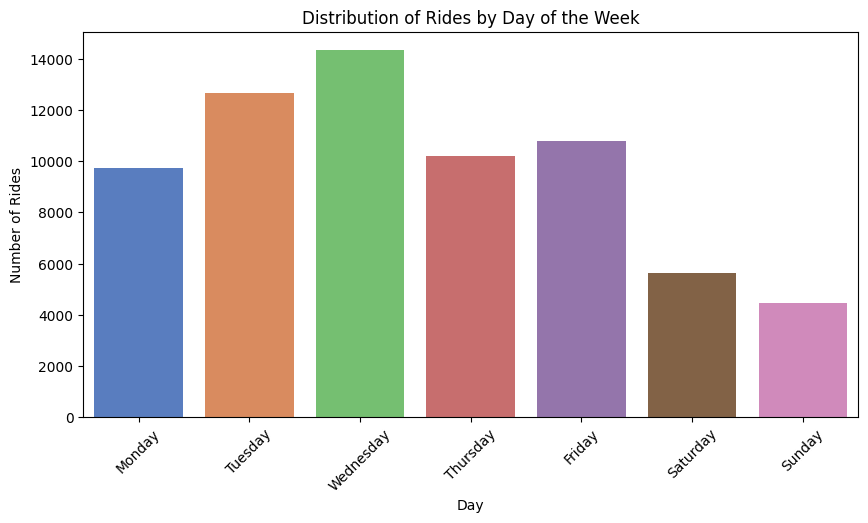

In [26]:
# 6. Start Day Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='start_day', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='muted')
plt.title('Distribution of Rides by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

# Conclusion after Univariate Analysis:

Most rides are under 20 minutes (normal for city bike-sharing).

Majority of users are aged between 25 to 40 years.

There are more male riders than female and others.

Most users are Subscribers (regular users), very few are casual customers.

Peak ride times are around 8 AM and 5 PM (office hours - commute pattern).

Weekdays have more rides compared to weekends.

#Bivariate Exploration and Analysis (Two Columns Together)

🎯 Goal: Find relationships between two variables. Examples:

Age vs Ride Duration

Gender vs Ride Duration

User Type vs Ride Duration

<ipython-input-27-938374e6b701>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='member_gender', y='ride_minutes', showfliers=False, palette='Set2')


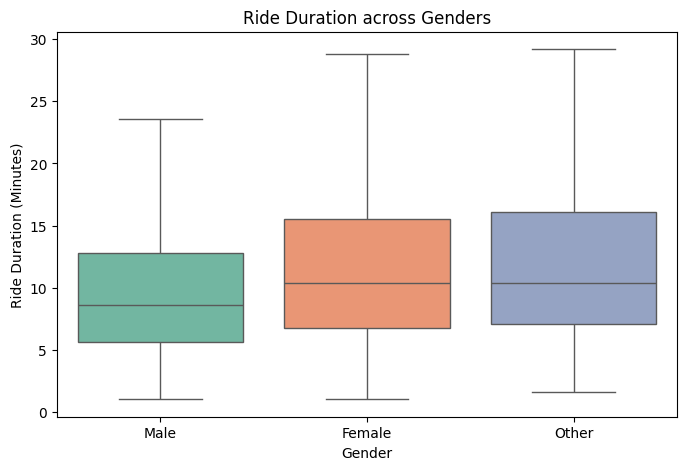

In [27]:
# 1. Boxplot: Gender vs Ride Duration
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='member_gender', y='ride_minutes', showfliers=False, palette='Set2')
plt.title('Ride Duration across Genders')
plt.xlabel('Gender')
plt.ylabel('Ride Duration (Minutes)')
plt.show()

<ipython-input-28-826511c1dd3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='user_type', y='ride_minutes', showfliers=False, palette='Set1')


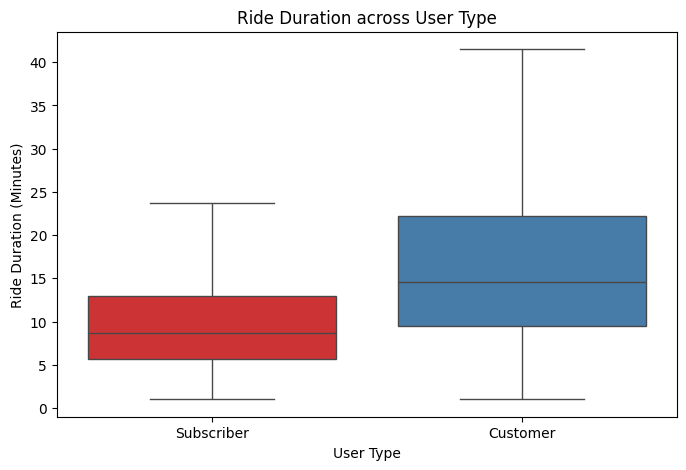

In [28]:
# 2. Boxplot: User Type vs Ride Duration
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='user_type', y='ride_minutes', showfliers=False, palette='Set1')
plt.title('Ride Duration across User Type')
plt.xlabel('User Type')
plt.ylabel('Ride Duration (Minutes)')
plt.show()

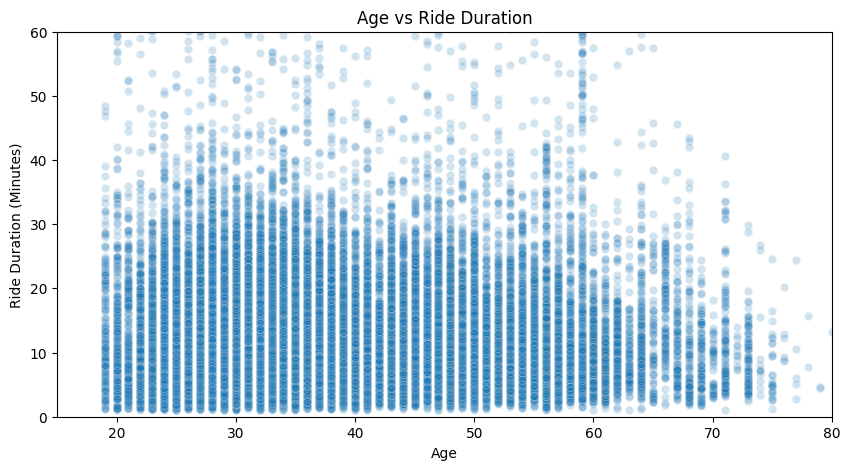

In [29]:
# 3. Scatterplot: Age vs Ride Duration
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='member_age', y='ride_minutes', alpha=0.2)
plt.title('Age vs Ride Duration')
plt.xlabel('Age')
plt.ylabel('Ride Duration (Minutes)')
plt.xlim(15, 80)
plt.ylim(0, 60)
plt.show()

#Conclusion after Bivariate Analysis:

Female and Male have similar median ride durations, slight variations.

Customers (casual users) tend to have longer ride times than Subscribers (regular users).

Younger riders (aged 20–35) dominate short rides.



#Multivariate Exploration and Analysis (Three or More Columns Together)

🎯 Goal: Study interactions among multiple columns.

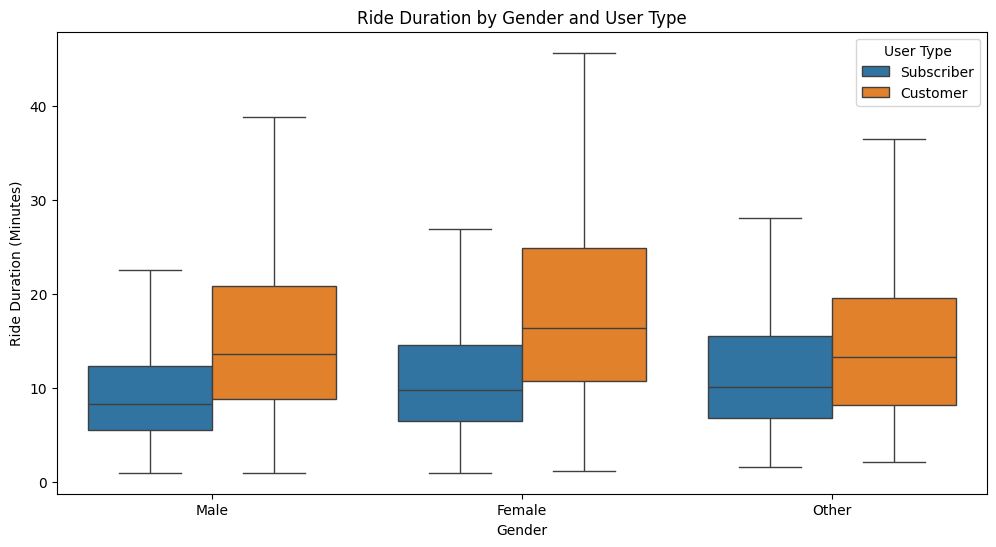

In [30]:
# 1. Ride Duration across Gender and User Type
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='member_gender', y='ride_minutes', hue='user_type', showfliers=False)
plt.title('Ride Duration by Gender and User Type')
plt.xlabel('Gender')
plt.ylabel('Ride Duration (Minutes)')
plt.legend(title='User Type')
plt.show()

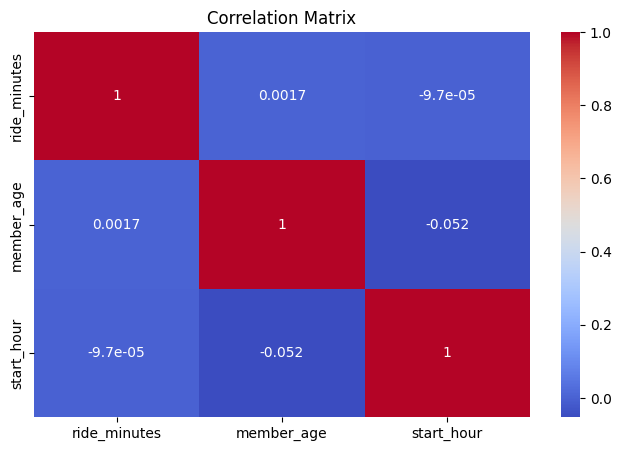

In [31]:
# 2. Heatmap: Correlation
plt.figure(figsize=(8,5))
corr = df[['ride_minutes', 'member_age', 'start_hour']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 #Conclusion after Multivariate Analysis:

Female customers tend to have slightly longer rides than male customers.

There is no strong correlation between age and ride duration.

Start hour is weakly correlated with ride duration.



# Final Conclusion and Key Findings (for your report):

✅ Most riders are young professionals aged 25–40 years.

✅ Bike usage is heaviest during commute hours (8 AM and 5 PM).

✅ Male subscribers dominate the user base.

✅ Customers (occasional riders) take longer
rides compared to regular subscribers.

✅ Ride times are mostly short, usually under 20 minutes.